In [3]:
import numpy as np
import xarray as xr
import pyrsktools
import glob
import seawater
import datetime
import subprocess

from getInletX import getInletX
import scipy.io as sio
from datetime import datetime, timedelta

import matplotlib.pyplot as plt

%matplotlib widget


/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_83572/3133348726.py:5: UserWarning: The seawater library is deprecated! Please use gsw instead.
  import seawater


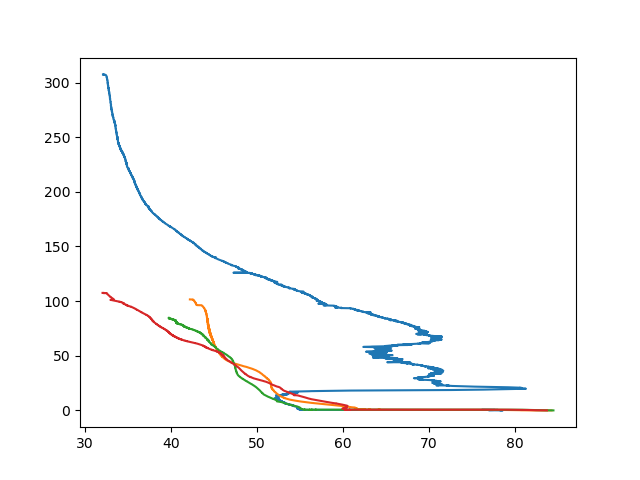

In [13]:
todo = 'salinity_00'
todo = 'oxygensaturation_00'
with xr.open_dataset('ctd/20250917/casts/206664_20250917172654.nc') as ds:
    fig, ax = plt.subplots()
    ax.plot(ds[todo], ds.depth_00)
with xr.open_dataset('ctd/20250917/casts/206664_20250917180516.nc') as ds:
    ax.plot(ds[todo], ds.depth_00)
with xr.open_dataset('ctd/20250917/casts/206664_20250917183002.nc') as ds:
    ax.plot(ds[todo], ds.depth_00)
with xr.open_dataset('ctd/20250917/casts/206664_20250917185244.nc') as ds:
    ax.plot(ds[todo], ds.depth_00)

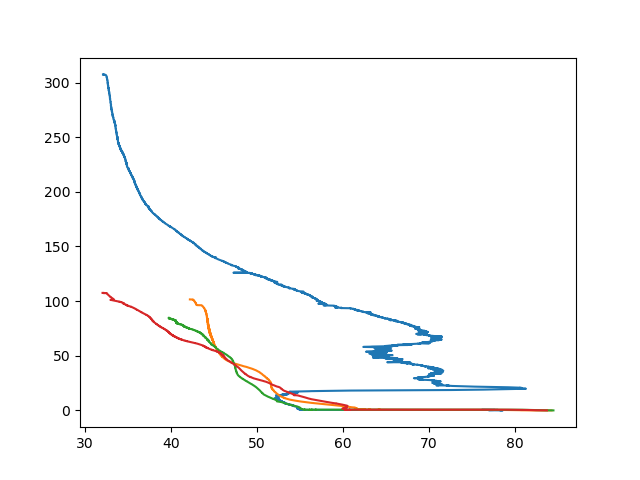

In [ ]:
todo = 'salinity_00'
todo = 'oxygensaturation_00'
with xr.open_dataset('ctd/20250929/casts/206664_20250917172654.nc') as ds:
    fig, ax = plt.subplots()
    ax.plot(ds[todo], ds.depth_00)
with xr.open_dataset('ctd/20250917/casts/206664_20250917180516.nc') as ds:
    ax.plot(ds[todo], ds.depth_00)
with xr.open_dataset('ctd/20250917/casts/206664_20250917183002.nc') as ds:
    ax.plot(ds[todo], ds.depth_00)
with xr.open_dataset('ctd/20250917/casts/206664_20250917185244.nc') as ds:
    ax.plot(ds[todo], ds.depth_00)

In [29]:
with xr.open_dataset('ctd/20250917/CTDGridGeoRuskin.nc') as ds:
    print(ds.alongx.values)

[14.96549655 14.96549655 14.96549655 14.96549655 14.96549655]


<xarray.Dataset> Size: 154kB
Dimensions:    (sample: 4798)
Coordinates:
  * sample     (sample) int64 38kB 0 1 2 3 4 5 ... 4792 4793 4794 4795 4796 4797
Data variables:
    time       (sample) float64 38kB ...
    latitude   (sample) float64 38kB ...
    longitude  (sample) float64 38kB ...

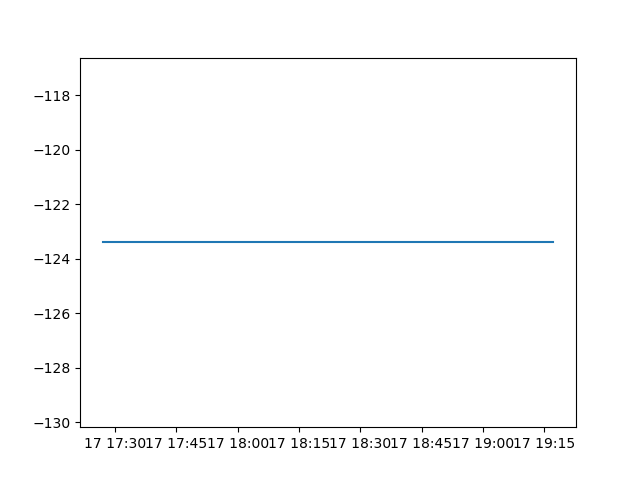

In [34]:
from pathlib import Path
maindir = Path('ctd/20250917')
with xr.open_dataset(maindir / 'Geo.nc', engine='netcdf4') as geods:
    display(geods)
    fig, ax = plt.subplots()
    ax.plot(ds.time, ds.longitude)


<xarray.Dataset> Size: 252kB
Dimensions:            (depths: 324, time: 12)
Coordinates:
  * time               (time) datetime64[ns] 96B 2025-09-17T17:26:54.62499993...
  * depths             (depths) float64 3kB 0.5 1.5 2.5 ... 321.5 322.5 323.5
    cast               (time) int64 96B ...
Data variables: (12/14)
    pressure           (depths, time) float64 31kB ...
    temperature        (depths, time) float64 31kB ...
    conductivity       (depths, time) float64 31kB ...
    chlorophyll        (depths, time) float64 31kB ...
    oxygensaturation   (depths, time) float64 31kB ...
    salinity           (depths, time) float64 31kB ...
    ...                 ...
    station_name       (time) <U5 240B ...
    water_depth        (time) float64 96B ...
    longitude          (time) float64 96B ...
    latitude           (time) float64 96B ...
    alongx             (time) float64 96B ...
    acrossx            (time) float64 96B ...

Text(0.5, 0, 'Along-track distance [km]')

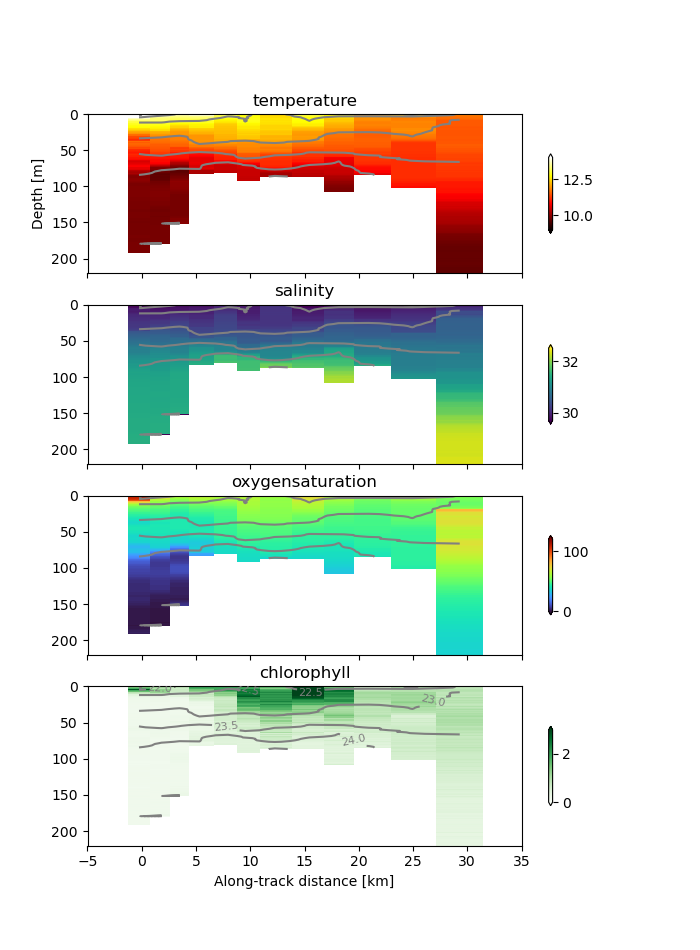

In [49]:
todo = ['temperature', 'salinity', 'oxygensaturation', 'chlorophyll']
cmap = ['hot', 'viridis', 'turbo', 'Greens']
clims = [[9, 14], [29.7, 32.5], [0, 120], [0, 3]]
fig, axs = plt.subplots(len(todo), sharex=True, figsize=(7, 9.5))
with xr.open_dataset('ctd/20250917/CTDGridGeoRuskin.nc') as ds:
    #ds = ds.isel(time=slice(1, None, 2))
    display(ds)
    for nn in range(len(todo)):
        pcm = axs[nn].pcolormesh(ds.alongx, ds.depths, ds[todo[nn]], cmap=cmap[nn], clim=clims[nn])
        cs = axs[nn].contour(ds.alongx, ds.depths, ds.potential_density-1000, levels=np.arange(20, 25, 0.5),
                       colors='0.5')
        if nn==3:
            axs[nn].clabel(cs, fontsize=8)
        fig.colorbar(pcm, ax=axs[nn], shrink=0.5, extend='both')
        axs[nn].set_ylim([220, 0])
        axs[nn].set_xlim([-5, 35])
        axs[nn].set_title(todo[nn])
axs[0].set_ylabel('Depth [m]')
axs[-1].set_xlabel('Along-track distance [km]')


Text(0.5, 0, 'Along-track distance [km]')

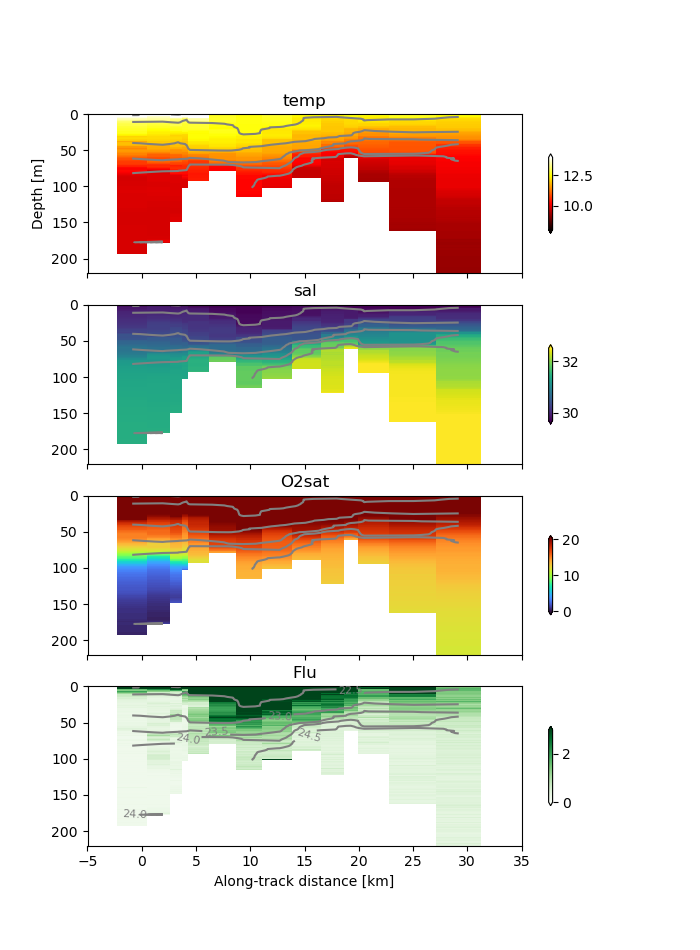

In [ ]:
todo = ['temp', 'sal', 'O2sat', 'Flu']
cmap = ['hot', 'viridis', 'turbo', 'Greens']
clims = [[8, 14], [29.7, 32.5], [0, 20], [0, 3]]
fig, axs = plt.subplots(len(todo), sharex=True, figsize=(7, 9.5))
with xr.open_dataset('ctd/20250929/CTDGridNew.nc') as ds:
    for nn in range(len(todo)):
        pcm = axs[nn].pcolormesh(ds.cast, ds.depths, ds[todo[nn]], cmap=cmap[nn], clim=clims[nn])
        cs = axs[nn].contour(ds.cast, ds.depths, ds.pden-1000, levels=np.arange(20, 25, 0.5),
                       colors='0.5')
        if nn==3:
            axs[nn].clabel(cs, fontsize=8)
        fig.colorbar(pcm, ax=axs[nn], shrink=0.5, extend='both')
        axs[nn].set_ylim([220, 0])
        axs[nn].set_xlim([-5, 35])
        axs[nn].set_title(todo[nn])
axs[0].set_ylabel('Depth [m]')
axs[-1].set_xlabel('Along-track distance [km]')


In [28]:
ds.lon.values

array([   0,    0, -123, -123, -123, -123, -123, -123, -123, -123])

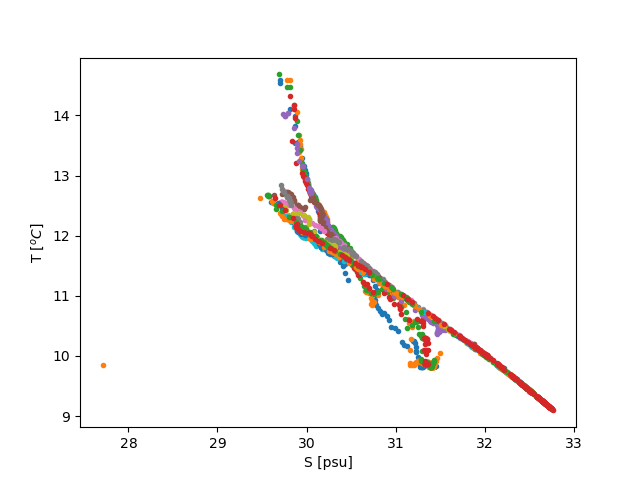

In [46]:
with xr.open_dataset('ctd/20250929/CTDGridNew.nc') as ds:
    fig, ax = plt.subplots()
    ax.plot(ds.sal, ds.temp, '.')
    ax.set_xlabel('S [psu]')
    ax.set_ylabel('T $[^oC]$')

In [2]:
todo = ['temperature', 'salinity', 'oxygensaturation', 'chlorophyll']
cmap = ['hot', 'viridis', 'turbo', 'Greens']
clims = [[9, 14], [29.7, 32.5], [0, 120], [0, 3]]
fig, axs = plt.subplots(len(todo), sharex=True, figsize=(7, 9.5))
with xr.open_dataset('20240929/CTDGridGeoRuskin.nc') as ds:
    ds = ds.isel(time=slice(1, None, 2))
    for nn in range(len(todo)):
        pcm = axs[nn].pcolormesh(ds.alongx, ds.depths, ds[todo[nn]], cmap=cmap[nn], clim=clims[nn])
        cs = axs[nn].contour(ds.alongx, ds.depths, ds.potential_density-1000, levels=np.arange(20, 25, 0.5),
                       colors='0.5')
        fig.colorbar(pcm, ax=axs[nn], shrink=0.5, extend='both')
        axs[nn].set_ylim([220, 0])
        axs[nn].set_xlim([0, 32])
        if nn==3:
            axs[nn].clabel(cs, fontsize=8)

        axs[nn].set_title(todo[nn])

NameError: name 'plt' is not defined

In [56]:
with xr.open_dataset('ctd/20250917/CTDGridNew.nc') as ds:
    display(ds)
    print(ds.alongx.values)

<xarray.Dataset> Size: 252kB
Dimensions:      (depths: 324, time: 12)
Coordinates:
  * time         (time) datetime64[ns] 96B 2025-09-17T17:26:54.624999936 ... ...
  * depths       (depths) float64 3kB 0.5 1.5 2.5 3.5 ... 321.5 322.5 323.5
    cast         (time) int64 96B ...
Data variables: (12/14)
    pres         (depths, time) float64 31kB ...
    temp         (depths, time) float64 31kB ...
    cond         (depths, time) float64 31kB ...
    Flu          (depths, time) float64 31kB ...
    O2sat        (depths, time) float64 31kB ...
    sal          (depths, time) float64 31kB ...
    ...           ...
    id           (time) <U5 240B ...
    water_depth  (time) float64 96B ...
    lon          (time) float64 96B ...
    lat          (time) float64 96B ...
    alongx       (time) float64 96B ...
    acrossx      (time) float64 96B ...

[29.30693069 24.93849385 20.91809181 18.15181518 15.44554455 13.13531353
 13.13531353 13.13531353 13.13531353 13.13531353 13.13531353 13.13531353]


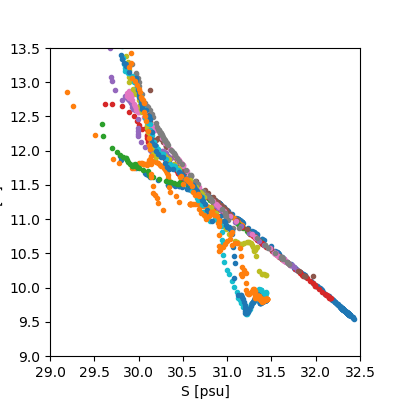

In [49]:
todo = ['temperature', 'salinity', 'oxygensaturation']
cmap = ['hot', 'viridis', 'turbo']
fig, axs = plt.subplots(1, 1, sharex=True, figsize=(4, 4))
with xr.open_dataset('ctd/20250917/CTDGridRuskin.nc') as ds:
    #ds = ds.isel(cast=slice(1, None, 2))
    axs.plot(ds.salinity, ds.temperature, '.')
    axs.set_xlabel('S [psu]')
    axs.set_ylabel('T [C]')
    axs.set_xlim(29, 32.5)
    axs.set_ylim(9, 13.5)



FileNotFoundError: [Errno 2] No such file or directory: '/Users/jklymak/Dropbox/Teaching/CruiseData314/CruiseData25/20250929/CTDGridNew.nc'

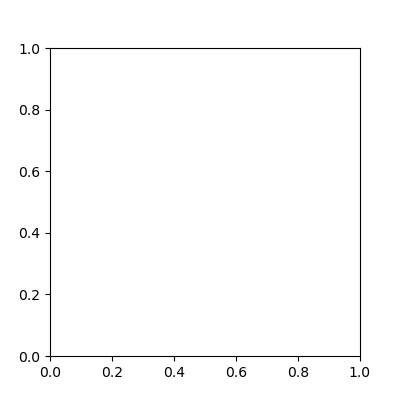

In [19]:
todo = ['temperature', 'salinity', 'oxygensaturation']
cmap = ['hot', 'viridis', 'turbo']
fig, axs = plt.subplots(1, 1, sharex=True, figsize=(4, 4))
with xr.open_dataset('20250929/CTDGridNew.nc') as ds:
    ds = ds.isel(cast=slice(1, None, 2))
    axs.plot(ds.salinity, ds.temperature, '.')
    axs.set_xlabel('S [psu]')
    axs.set_ylabel('T [C]')
    axs.set_xlim(29, 32.5)
    axs.set_ylim(9, 16.5)



<xarray.Dataset> Size: 116kB
Dimensions:  (time: 3627)
Coordinates:
  * time     (time) datetime64[ns] 29kB 2025-09-17T15:35:55.292000 ... 2025-0...
Data variables:
    lat      (time) float64 29kB ...
    lon      (time) float64 29kB ...
    acc      (time) float64 29kB ...

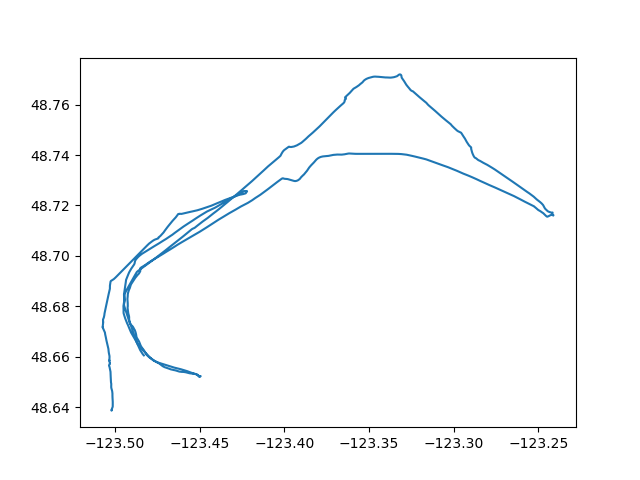

In [52]:
with xr.open_dataset('output_gpx.nc') as ds:
    display(ds)
    fig, ax = plt.subplots()
    ax.plot(ds.lon, ds.lat)

In [ ]:

cruise_name = '20230923'
dir = cruise_name
# these are determined by hand.  Ruskin software should do this,
# but didn't seem to work 2022..
Casts = {'H1': [1769, 5710],
         'A2': [9764, 11523],
        'A3': [13690, 14920],
        'A5': [16923, 18330],
        'S8': [19800, 20745],
         'S5.5': [22680, 23759],
         'S5': [25551, 26657],
         'S12.5': [28342, 29530],
         'S12': [30960, 32235],
         'S4.5': [33620, 35450],
         'S4.25': [37950, 39865],
         'S4': [42230, 44660]
        }

ruskinname = f'{dir}/ruskin/Strickland_23Sept2023.rsk'
print(ruskinname)
if True:
    # rsk to xarray
    with pyrsktools.open(ruskinname) as rsk:
        print(rsk)
        channel_names = rsk.channels.keys()
        fig, ax = plt.subplots()
        ax.plot(rsk.npsamples()['pressure_00'])


20230923/ruskin/Strickland_23Sept2023.rsk


OperationalError: unable to open database file

<xarray.Dataset>
Dimensions:  (depths: 324, time: 12)
Coordinates:
  * depths   (depths) float64 0.5 1.5 2.5 3.5 4.5 ... 320.5 321.5 322.5 323.5
    cast     (time) int64 ...
  * time     (time) datetime64[ns] 2023-09-23T15:43:51.624999936 ... 2023-09-...
Data variables: (12/13)
    pres     (depths, time) float64 ...
    temp     (depths, time) float64 ...
    cond     (depths, time) float64 ...
    Flu      (depths, time) float64 ...
    O2sat    (depths, time) float64 ...
    sal      (depths, time) float64 ...
    ...       ...
    pden     (depths, time) float64 ...
    id       (time) object ...
    lon      (time) float64 ...
    lat      (time) float64 ...
    alongx   (time) float64 ...
    acrossx  (time) float64 ...


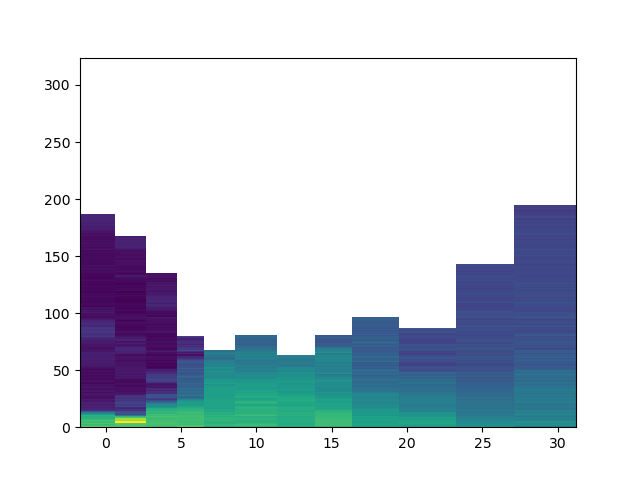

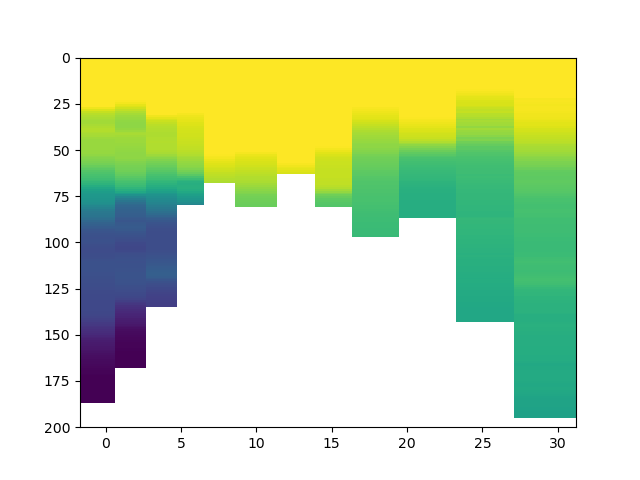

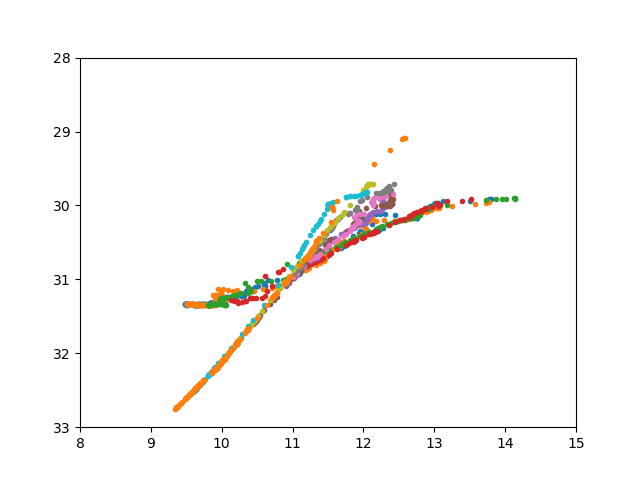

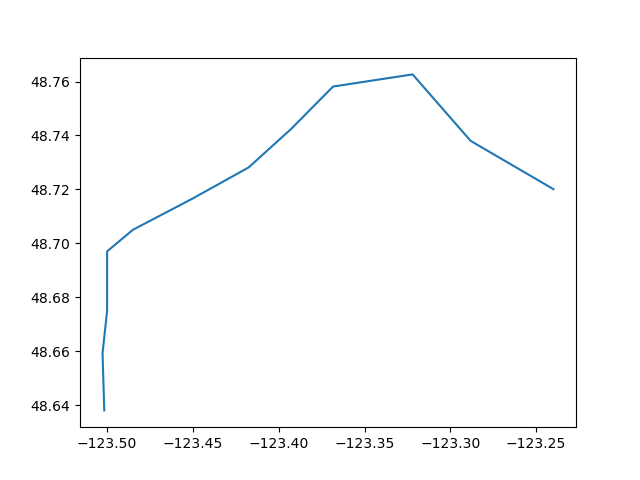

In [ ]:
with xr.open_dataset('20230923/CtdGridNew.nc') as ds:
    print(ds)
    fig, ax = plt.subplots()
    ax.pcolormesh(ds.alongx, ds.depths,np.log10(ds.Flu))
    fig, ax = plt.subplots()
    ax.pcolormesh(ds.alongx, ds.depths,ds.O2sat, vmin=0, vmax=50)
    ax.set_ylim(200, 0)
    fig, ax = plt.subplots()
    ax.plot( ds.temp, ds.sal, '.')
    ax.set_ylim(33, 28)
    ax.set_xlim(8, 15)

    fig, ax = plt.subplots()
    ax.plot(ds.lon, ds.lat)

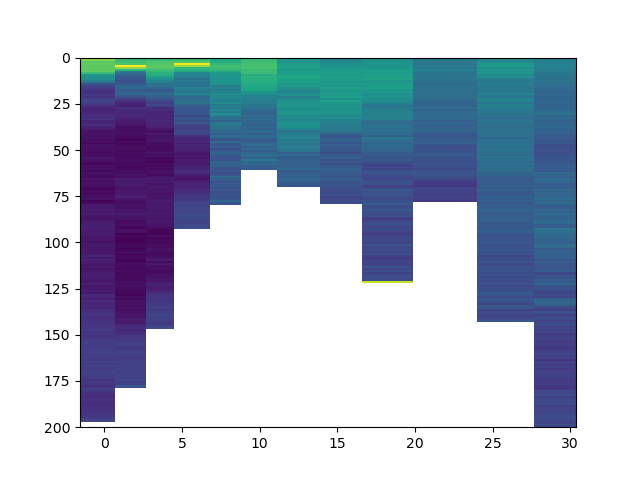

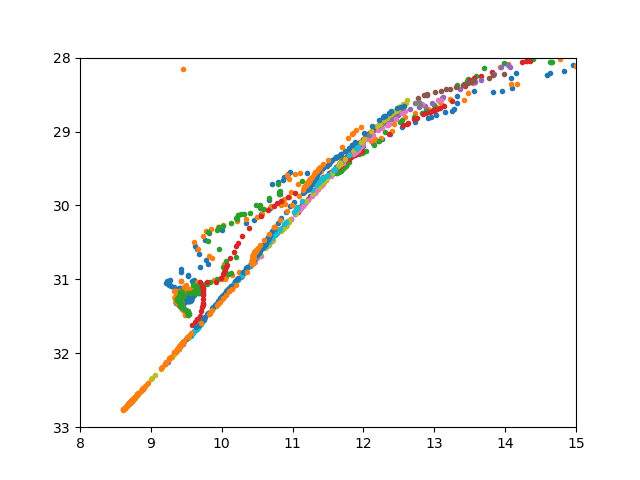

In [ ]:
with xr.open_dataset('../CruiseData22/rbrctd/20220924/CtdGridNew.nc') as ds:
    fig, ax = plt.subplots()
    ax.pcolormesh(ds.alongx, ds.depths, np.log10(ds.Flu))
    ax.set_ylim(200, 0)
    fig, ax = plt.subplots()
    ax.plot(ds.temp, ds.sal, '.')
    ax.set_ylim(33, 28)
    ax.set_xlim(8, 15)

20230927/ruskin/Strickland_27_1_Sep2023.rsk
RSK(name='20230927/ruskin/Strickland_27_1_Sep2023.rsk', channels=OrderedDict([('conductivity_00', Channel(id=1, key='cond10', label='conductivity_00', name='Conductivity', units='mS/cm', derived=False)), ('temperature_00', Channel(id=2, key='temp14', label='temperature_00', name='Temperature', units='°C', derived=False)), ('pressure_00', Channel(id=3, key='pres24', label='pressure_00', name='Pressure', units='dbar', derived=False)), ('chlorophyll_00', Channel(id=4, key='fluo10', label='chlorophyll_00', name='Chlorophyll a', units='µg/l', derived=False)), ('oxygensaturation_00', Channel(id=5, key='doxy03', label='oxygensaturation_00', name='Dissolved O₂ saturation', units='%', derived=False)), ('par_00', Channel(id=6, key='par_00', label='par_00', name='PAR', units='µMol/m²/s', derived=False)), ('seapressure_00', Channel(id=7, key='pres08', label='seapressure_00', name='Sea pressure', units='dbar', derived=True)), ('depth_00', Channel(id=8, ke

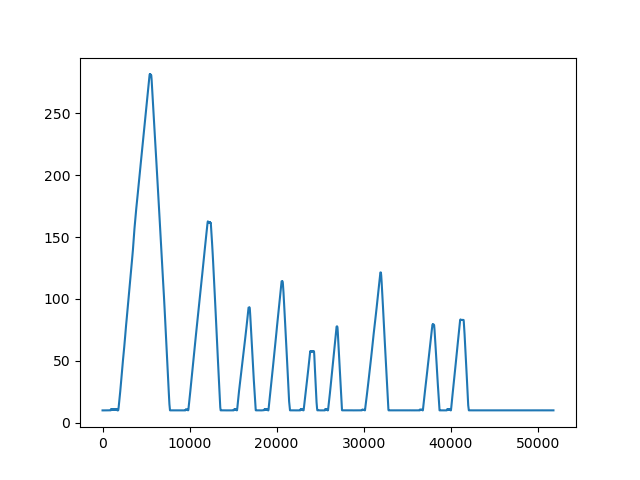

In [4]:
dir = '20230927'
ruskinname = f'{dir}/ruskin/Strickland_27_1_Sep2023.rsk'
print(ruskinname)
if True:
    # rsk to xarray
    with pyrsktools.open(ruskinname) as rsk:
        print(rsk)
        channel_names = rsk.channels.keys()
        fig, ax = plt.subplots()
        ax.plot(rsk.npsamples()['pressure_00'])

20230927/ruskin/Strickland_27_2_Sep2023.rsk
RSK(name='20230927/ruskin/Strickland_27_2_Sep2023.rsk', channels=OrderedDict([('conductivity_00', Channel(id=1, key='cond10', label='conductivity_00', name='Conductivity', units='mS/cm', derived=False)), ('temperature_00', Channel(id=2, key='temp14', label='temperature_00', name='Temperature', units='°C', derived=False)), ('pressure_00', Channel(id=3, key='pres24', label='pressure_00', name='Pressure', units='dbar', derived=False)), ('chlorophyll_00', Channel(id=4, key='fluo10', label='chlorophyll_00', name='Chlorophyll a', units='µg/l', derived=False)), ('oxygensaturation_00', Channel(id=5, key='doxy03', label='oxygensaturation_00', name='Dissolved O₂ saturation', units='%', derived=False)), ('par_00', Channel(id=6, key='par_00', label='par_00', name='PAR', units='µMol/m²/s', derived=False)), ('seapressure_00', Channel(id=7, key='pres08', label='seapressure_00', name='Sea pressure', units='dbar', derived=True)), ('depth_00', Channel(id=8, ke

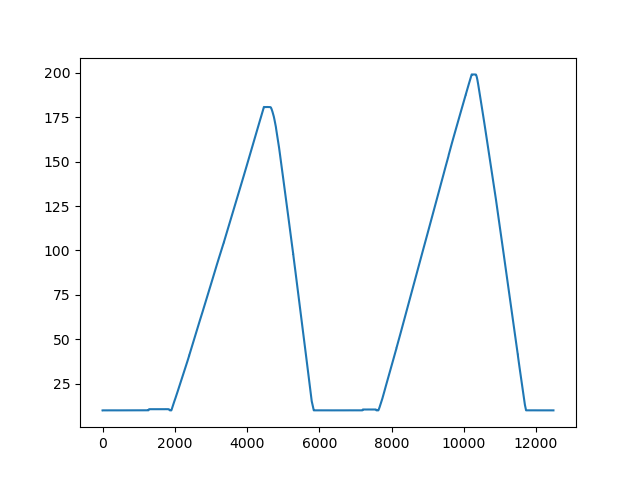

In [6]:
dir = '20230927'
ruskinname = f'{dir}/ruskin/Strickland_27_2_Sep2023.rsk'
print(ruskinname)
if True:
    # rsk to xarray
    with pyrsktools.open(ruskinname) as rsk:
        print(rsk)
        channel_names = rsk.channels.keys()
        fig, ax = plt.subplots()
        ax.plot(rsk.npsamples()['pressure_00'])

<xarray.Dataset> Size: 86kB
Dimensions:            (depths: 324, cast: 4)
Coordinates:
  * depths             (depths) float64 3kB 0.5 1.5 2.5 ... 321.5 322.5 323.5
  * cast               (cast) int64 32B 0 1 2 3
Data variables:
    time               (cast) datetime64[ns] 32B ...
    pressure           (depths, cast) float64 10kB ...
    temperature        (depths, cast) float64 10kB ...
    conductivity       (depths, cast) float64 10kB ...
    chlorophyll        (depths, cast) float64 10kB ...
    oxygensaturation   (depths, cast) float64 10kB ...
    salinity           (depths, cast) float64 10kB ...
    par                (depths, cast) float64 10kB ...
    potential_density  (depths, cast) float64 10kB ...
    station_name       (cast) <U3 48B ...


AttributeError: 'Dataset' object has no attribute 'lon'

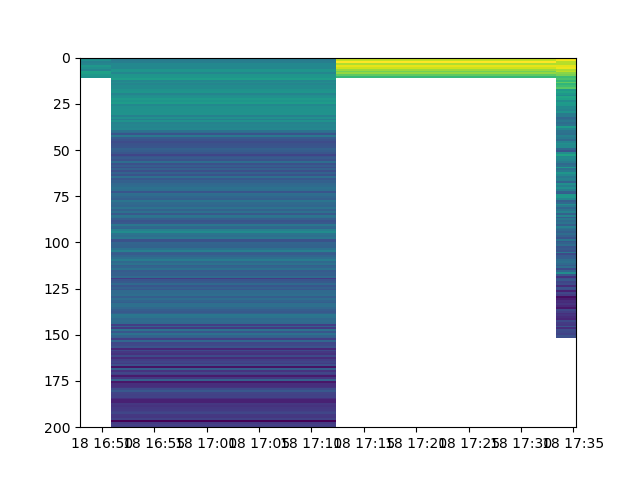

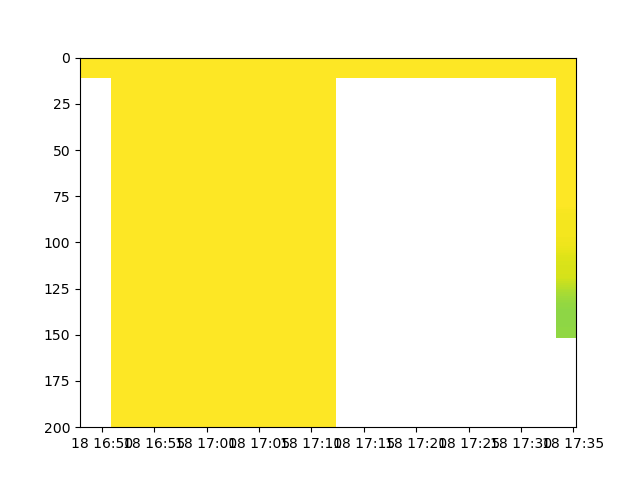

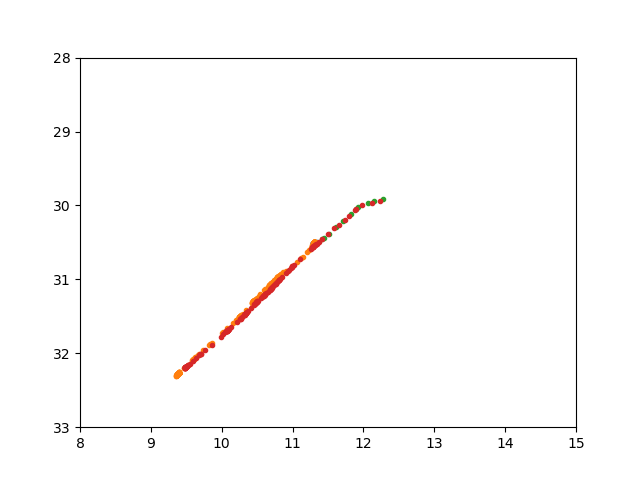

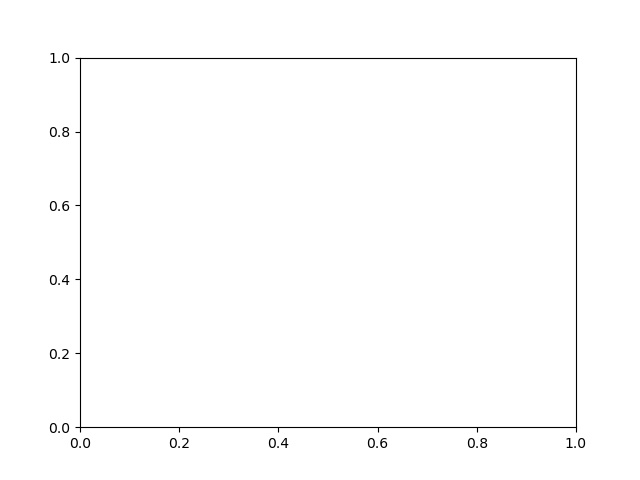

In [8]:
with xr.open_dataset('20240918/CtdGridRuskin.nc') as ds:
    print(ds)
    fig, ax = plt.subplots()
    ax.pcolormesh(ds.time, ds.depths, np.log10(ds.chlorophyll))
    ax.set_ylim(200, 0)
    fig, ax = plt.subplots()
    ax.pcolormesh(ds.time, ds.depths, ds.oxygensaturation, vmin=0, vmax=50)
    ax.set_ylim(200, 0)
    fig, ax = plt.subplots()
    ax.plot( ds.temperature, ds.salinity, '.')
    ax.set_ylim(33, 28)
    ax.set_xlim(8, 15)

    fig, ax = plt.subplots()
    ax.plot(ds.lon, ds.lat)

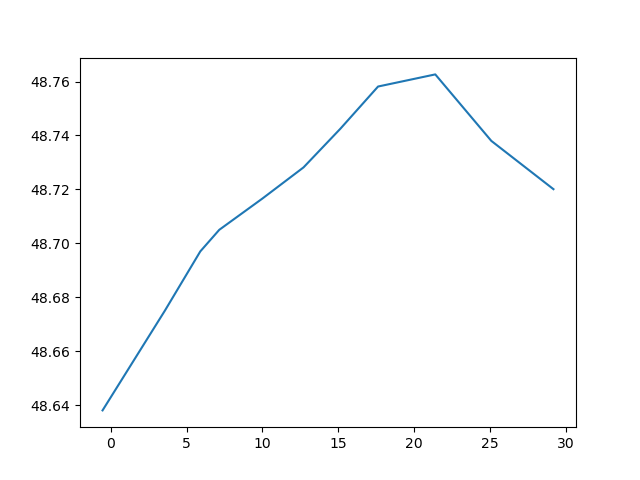

In [21]:
    fig, ax = plt.subplots()
    ax.plot(ds.alongx, ds.lat)

In [22]:
ds.id.values


array(['S12', 'S12.5', 'S5', 'S5.5', 'S8', 'A5', 'A3', 'A2', 'A1', 'S4',
       'S4.5'], dtype=object)

In [26]:
ds.alongx.values

array([-0.53405341,  3.57035704,  5.90459046,  7.15271527, 10.0090009 ,
       12.70327033, 15.12751275, 17.61176118, 21.38013801, 25.07050705,
       29.16291629])

In [28]:
ds

<xarray.Dataset>
Dimensions:  (depths: 324, time: 11)
Coordinates:
  * depths   (depths) float64 0.5 1.5 2.5 3.5 4.5 ... 320.5 321.5 322.5 323.5
    cast     (time) int64 ...
  * time     (time) datetime64[ns] 2023-09-27T15:27:56.500000 ... 2023-09-27T...
Data variables: (12/13)
    pres     (depths, time) float64 ...
    temp     (depths, time) float64 13.79 13.61 13.14 12.89 ... nan nan nan nan
    cond     (depths, time) float64 ...
    Flu      (depths, time) float64 9.718 5.323 4.618 3.885 ... nan nan nan nan
    O2sat    (depths, time) float64 ...
    sal      (depths, time) float64 29.88 29.91 29.91 30.06 ... nan nan nan nan
    ...       ...
    pden     (depths, time) float64 ...
    id       (time) object ...
    lon      (time) float64 -123.5 -123.5 -123.5 -123.5 ... -123.3 -123.3 -123.2
    lat      (time) float64 48.64 48.67 48.7 48.7 ... 48.76 48.76 48.74 48.72
    alongx   (time) float64 -0.5341 3.57 5.905 7.153 ... 17.61 21.38 25.07 29.16
    acrossx  (time) float64 ...

In [59]:
import pyrsktools


In [ ]:
cruise_name = '20240918'
dir = cruise_name
ruskinname = f'{dir}/ruskin/206663_20240918_0946.rsk'

with pyrsktools.open(ruskinname) as rsk:
    display(rsk)
    print(rsk)
    for dd in rsk.casts(direction='DOWN'):
        print('HI')
        print(dd)

RSK(name='20240918/ruskin/206663_20240918_0946.rsk', channels=OrderedDict({'conductivity_00': Channel(id=1, key='cond10', label='conductivity_00', name='Conductivity', units='mS/cm', derived=False), 'temperature_00': Channel(id=2, key='temp14', label='temperature_00', name='Temperature', units='°C', derived=False), 'pressure_00': Channel(id=3, key='pres24', label='pressure_00', name='Pressure', units='dbar', derived=False), 'chlorophyll_00': Channel(id=4, key='fluo10', label='chlorophyll_00', name='Chlorophyll a', units='µg/l', derived=False), 'oxygensaturation_00': Channel(id=5, key='doxy03', label='oxygensaturation_00', name='Dissolved O₂ saturation', units='%', derived=False), 'par_00': Channel(id=6, key='par_00', label='par_00', name='PAR', units='µMol/m²/s', derived=False), 'seapressure_00': Channel(id=7, key='pres08', label='seapressure_00', name='Sea pressure', units='dbar', derived=True), 'depth_00': Channel(id=8, key='dpth01', label='depth_00', name='Depth', units='m', derived

RSK(name='20240918/ruskin/206663_20240918_0946.rsk', channels=OrderedDict({'conductivity_00': Channel(id=1, key='cond10', label='conductivity_00', name='Conductivity', units='mS/cm', derived=False), 'temperature_00': Channel(id=2, key='temp14', label='temperature_00', name='Temperature', units='°C', derived=False), 'pressure_00': Channel(id=3, key='pres24', label='pressure_00', name='Pressure', units='dbar', derived=False), 'chlorophyll_00': Channel(id=4, key='fluo10', label='chlorophyll_00', name='Chlorophyll a', units='µg/l', derived=False), 'oxygensaturation_00': Channel(id=5, key='doxy03', label='oxygensaturation_00', name='Dissolved O₂ saturation', units='%', derived=False), 'par_00': Channel(id=6, key='par_00', label='par_00', name='PAR', units='µMol/m²/s', derived=False), 'seapressure_00': Channel(id=7, key='pres08', label='seapressure_00', name='Sea pressure', units='dbar', derived=True), 'depth_00': Channel(id=8, key='dpth01', label='depth_00', name='Depth', units='m', derived

In [93]:
rsk.casts

<bound method RSK.casts of RSK(name='20240918/ruskin/206663_20240918_0946.rsk', channels=OrderedDict({'conductivity_00': Channel(id=1, key='cond10', label='conductivity_00', name='Conductivity', units='mS/cm', derived=False), 'temperature_00': Channel(id=2, key='temp14', label='temperature_00', name='Temperature', units='°C', derived=False), 'pressure_00': Channel(id=3, key='pres24', label='pressure_00', name='Pressure', units='dbar', derived=False), 'chlorophyll_00': Channel(id=4, key='fluo10', label='chlorophyll_00', name='Chlorophyll a', units='µg/l', derived=False), 'oxygensaturation_00': Channel(id=5, key='doxy03', label='oxygensaturation_00', name='Dissolved O₂ saturation', units='%', derived=False), 'par_00': Channel(id=6, key='par_00', label='par_00', name='PAR', units='µMol/m²/s', derived=False), 'seapressure_00': Channel(id=7, key='pres08', label='seapressure_00', name='Sea pressure', units='dbar', derived=True), 'depth_00': Channel(id=8, key='dpth01', label='depth_00', name=

<generator object RSK._query_regions at 0x2947eb9c0>

In [6]:
dir = '20240918'
cruise_name = dir
with xr.open_dataset(f'{dir}/CtdGridNew.nc') as cgrid:
    display(cgrid)
    for i in range(cgrid.dims['time']):
        ds = cgrid.isel(time=i)
        id = str(ds.id.values).strip('.')
        name = f'{cruise_name}_{id}'.replace('.', '')
        ds.to_netcdf(f'{dir}/{name}.nc')

        # csv:

        df = cgrid.isel(time=i).to_pandas()
        csv_name = f'{dir}/ctdgrid_csv/ctd' + str(cgrid.id[i].values) + '.csv'
        df.to_csv(csv_name)

        # matlab:
        cout = {}
        cout['time'] = datetime642matlab(ds.time.values)
        cout['depths'] = ds.depths.values
        for k in ds.keys():
            cout[k] = ds[k].values
        outname = f'{dir}/{name}New.mat'
        sio.savemat(outname, cout)
        subprocess.call(['octave', 'saveasstruct.m', outname, 'ctd'])


<xarray.Dataset> Size: 273kB
Dimensions:  (depths: 324, time: 13)
Coordinates:
  * depths   (depths) float64 3kB 0.5 1.5 2.5 3.5 ... 320.5 321.5 322.5 323.5
    cast     (time) int64 104B ...
  * time     (time) datetime64[ns] 104B 2024-09-18T16:52:20.750000128 ... 202...
Data variables: (12/13)
    pres     (depths, time) float64 34kB ...
    temp     (depths, time) float64 34kB ...
    cond     (depths, time) float64 34kB ...
    Flu      (depths, time) float64 34kB ...
    O2sat    (depths, time) float64 34kB ...
    sal      (depths, time) float64 34kB ...
    ...       ...
    pden     (depths, time) float64 34kB ...
    id       (time) <U5 260B ...
    lon      (time) float64 104B ...
    lat      (time) float64 104B ...
    alongx   (time) float64 104B ...
    acrossx  (time) float64 104B ...

/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_12375/232844014.py:5: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for i in range(cgrid.dims['time']):


OSError: Cannot save file into a non-existent directory: '20240918/ctdgrid_csv'

## Make ODV version


In [ ]:
!mkdir 20240925/casts_binned_csv/
!rm 20240925_binned.csv


columnrename = {
    'depths': 'depth [m]',
    'id': 'Station',
    'lon': 'longitude [degE]',
    'lat': 'latitude [degN]',
    'water_depth': 'Bot.Depth [m]',
    'year': 'year',
    'month': 'month',
    'day': 'day',
    'hour': 'hour',
    'minute': 'minute',
    'temp': 'temperature [oC]',
    'sal': 'salinity [PSS-78]',
    'pres': 'Pressure [dbar]',
    'pden': 'potential density [kg m-3]',
    'Flu': 'chlorophyll fluorescence [ug L-1]',
    'Par': 'PAR [umol-photons m-2 s-1]',
    'O2conc': 'O2 conc [umol kg-1]',
    'O2sat': 'O2 saturation [%]',
    'cond': 'conductivity [S/dm]',
    'alongx': 'along-track [km]',
    'acrossx': 'across-track [km]',
    'O2sat0': 'O2 conc at saturation [umol kg-1]'
}

with xr.open_dataset('20240925/CtdGridNew.nc') as ds:
    ds['O2sat0'] = (('depths', 'time'), seawater.satO2(ds.sal, ds.temp))
    ds['O2conc'] = ds.O2sat0 * ds.O2sat
    dates = ds.time.values
    years = dates.astype('datetime64[Y]').astype(int) + 1970
    months = dates.astype('datetime64[M]').astype(int) % 12 + 1
    days = dates.astype('datetime64[D]') - dates.astype('datetime64[M]') + 1
    hours = dates.astype('datetime64[h]').astype(int) % 24
    minutes = dates.astype('datetime64[m]').astype(int) % 60
    print(hours, minutes, dates)
    ds['year'] = ('time', years)
    ds['month'] = ('time', months)
    ds['day'] = ('time', days)
    ds['hour'] = ('time', hours)
    ds['minute'] = ('time', minutes)
    for nn in range(len(ds.time)):
        pro = ds.isel(time=nn)
        pro = pro.where(np.isfinite(pro.temp), drop=True)
        df = pro.to_pandas()
        df['day'] = days[nn].astype('int32')
        df = df.astype({'year':'int32', 'day':'int32', 'month':'int32', 'hour':'int32', 'minute':'int32'})
        df.index.name = 'depth [m]'

        df = df.loc[:, list(columnrename.keys())[1:]]
        df = df.drop(columns=['O2sat0'])
        df = df.rename(columns=columnrename)
        df.to_csv(f'20240925/casts_binned_csv/cast{nn}.csv')
        print(df['year'].dtype)
        df.to_csv('20240925_binned.csv', mode='a', header=(nn==0))

mkdir: 20240925/casts_binned_csv/: File exists
[16 17 17 18 18 18 20 21 21 21 22 22 22 22] [43 10 39  8 31 51 54 16 32 52  6 18 35 56] ['2024-09-25T16:43:15.375000064' '2024-09-25T17:10:36.000000000'
 '2024-09-25T17:39:09.624999936' '2024-09-25T18:08:59.124999936'
 '2024-09-25T18:31:12.624999936' '2024-09-25T18:51:27.124999936'
 '2024-09-25T20:54:15.750000128' '2024-09-25T21:16:46.624999936'
 '2024-09-25T21:32:45.750000128' '2024-09-25T21:52:49.000000000'
 '2024-09-25T22:06:38.124999936' '2024-09-25T22:18:18.875000064'
 '2024-09-25T22:35:58.124999936' '2024-09-25T22:56:09.500000000']
int32
int32
int32
int32
int32
int32
int32
int32
int32


/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_12375/2974730223.py:42: UserWarning: Converting non-nanosecond precision timedelta values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  ds['day'] = ('time', days)
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_12375/2974730223.py:42: UserWarning: Converting non-nanosecond precision timedelta values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or 

int32
int32
int32
int32
int32


In [144]:
df

Station  longitude [degE]  latitude [degN]  Bot.Depth [m]  year  \
depth [m]                                                                   
0.5            ??       -123.501714        48.638565          200.0  2024   
1.5            ??       -123.501714        48.638565          200.0  2024   
2.5            ??       -123.501714        48.638565          200.0  2024   
3.5            ??       -123.501714        48.638565          200.0  2024   
4.5            ??       -123.501714        48.638565          200.0  2024   
...           ...               ...              ...            ...   ...   
190.5          ??       -123.501714        48.638565          200.0  2024   
191.5          ??       -123.501714        48.638565          200.0  2024   
192.5          ??       -123.501714        48.638565          200.0  2024   
193.5          ??       -123.501714        48.638565          200.0  2024   
194.5          ??       -123.501714        48.638565          200.0  2024   

           month  day  hour  minute  temperature [oC]  salinity [PSS-78]  \
depth [m]                                                                  
0.5            9   25    22      56         14.170317          29.666120   
1.5            9   25    22      56         14.022036          29.688834   
2.5            9   25    22      56         13.507640          29.810845   
3.5            9   25    22      56         13.125631          29.825122   
4.5            9   25    22      56         12.946890          29.845669   
...          ...  ...   ...     ...               ...                ...   
190.5          9   25    22      56          9.752997          31.417865   
191.5          9   25    22      56          9.752201          31.418605   
192.5          9   25    22      56          9.751493          31.420422   
193.5          9   25    22      56          9.751282          31.421437   
194.5          9   25    22      56          9.751946          31.428099   

           Pressure [dbar]  potential density [kg m-3]  \
depth [m]                                                
0.5               0.679395                 1022.034882   
1.5               1.473637                 1022.082029   
2.5               2.525987                 1022.278495   
3.5               3.527064                 1022.363548   
4.5               4.515945                 1022.413739   
...                    ...                         ...   
190.5           192.075224                 1024.199644   
191.5           193.105927                 1024.200367   
192.5           194.090200                 1024.201916   
193.5           195.101051                 1024.202760   
194.5           195.708946                 1024.207864   

           chlorophyll fluorescence [ug L-1]  PAR [umol-photons m-2 s-1]  \
depth [m]                                                                  
0.5                                 4.099205                  169.734827   
1.5                                 9.352849                  122.169102   
2.5                                19.665751                   80.091518   
3.5                                35.789798                   52.080458   
4.5                                35.911570                   25.777344   
...                                      ...                         ...   
190.5                               0.174544                    0.048112   
191.5                               0.188599                    0.051544   
192.5                               0.238472                    0.050098   
193.5                               0.186671                    0.051241   
194.5                               0.191036                    0.048316   

           O2 conc [umol kg-1]  O2 saturation [%]  conductivity [S/dm]  \
depth [m]                                                                
0.5                 660.386696         110.480483            36.297064   
1.5                 666.345255         111.151780    

In [99]:
list(columnrename.keys())[1:]

['id',
 'lon',
 'lat',
 'water_depth',
 'temp',
 'sal',
 'pres',
 'pden',
 'Flu',
 'Par',
 'O2conc',
 'O2sat',
 'cond',
 'alongx',
 'acrossx',
 'O2sat0']

In [53]:
df.columns[4]

'O2sat'

In [60]:
df.index.name = 'depth [m]'

In [145]:
df

Station  longitude [degE]  latitude [degN]  Bot.Depth [m]  year  \
depth [m]                                                                   
0.5            ??       -123.501714        48.638565          200.0  2024   
1.5            ??       -123.501714        48.638565          200.0  2024   
2.5            ??       -123.501714        48.638565          200.0  2024   
3.5            ??       -123.501714        48.638565          200.0  2024   
4.5            ??       -123.501714        48.638565          200.0  2024   
...           ...               ...              ...            ...   ...   
190.5          ??       -123.501714        48.638565          200.0  2024   
191.5          ??       -123.501714        48.638565          200.0  2024   
192.5          ??       -123.501714        48.638565          200.0  2024   
193.5          ??       -123.501714        48.638565          200.0  2024   
194.5          ??       -123.501714        48.638565          200.0  2024   

           month  day  hour  minute  temperature [oC]  salinity [PSS-78]  \
depth [m]                                                                  
0.5            9   25    22      56         14.170317          29.666120   
1.5            9   25    22      56         14.022036          29.688834   
2.5            9   25    22      56         13.507640          29.810845   
3.5            9   25    22      56         13.125631          29.825122   
4.5            9   25    22      56         12.946890          29.845669   
...          ...  ...   ...     ...               ...                ...   
190.5          9   25    22      56          9.752997          31.417865   
191.5          9   25    22      56          9.752201          31.418605   
192.5          9   25    22      56          9.751493          31.420422   
193.5          9   25    22      56          9.751282          31.421437   
194.5          9   25    22      56          9.751946          31.428099   

           Pressure [dbar]  potential density [kg m-3]  \
depth [m]                                                
0.5               0.679395                 1022.034882   
1.5               1.473637                 1022.082029   
2.5               2.525987                 1022.278495   
3.5               3.527064                 1022.363548   
4.5               4.515945                 1022.413739   
...                    ...                         ...   
190.5           192.075224                 1024.199644   
191.5           193.105927                 1024.200367   
192.5           194.090200                 1024.201916   
193.5           195.101051                 1024.202760   
194.5           195.708946                 1024.207864   

           chlorophyll fluorescence [ug L-1]  PAR [umol-photons m-2 s-1]  \
depth [m]                                                                  
0.5                                 4.099205                  169.734827   
1.5                                 9.352849                  122.169102   
2.5                                19.665751                   80.091518   
3.5                                35.789798                   52.080458   
4.5                                35.911570                   25.777344   
...                                      ...                         ...   
190.5                               0.174544                    0.048112   
191.5                               0.188599                    0.051544   
192.5                               0.238472                    0.050098   
193.5                               0.186671                    0.051241   
194.5                               0.191036                    0.048316   

           O2 conc [umol kg-1]  O2 saturation [%]  conductivity [S/dm]  \
depth [m]                                                                
0.5                 660.386696         110.480483            36.297064   
1.5                 666.345255         111.151780    